In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

# 엣지 검출

## 이미지 필터와 합성곱

### 합성곱 함수 구현하기

In [2]:
import numpy as np

def Conv2D(img, kernel=None, padding="valid"):
    if kernel is not None :
        sy, sx = int(len(kernel)/2), int(len(kernel[0])/2) 
        h, w = img.shape[0:2]
        if padding=="same": # zero padding
            new_shape = (h+2*sy, w+2*sx)
            img_out = np.zeros(new_shape, dtype=np.uint8)
        elif padding=="valid": # 처리 못하는 바깥 화소를 처리 안함
            img_out = np.zeros(img.shape, dtype=np.uint8)

        height, width = img_out.shape
        for y in range(sy, height-sy):
            for x in range(sx, width-sx):
                roi = img[y-sy:y+sy+1, x-sx:x+sx+1]
                y_, x_ = roi.shape
                filtered = roi * kernel[:y_, :x_]
                pixel = np.abs(np.sum(filtered))
                img_out[y, x] = np.uint8(pixel)
                
        return img_out[sy:-sy, sx:-sx]
    else:
        print("Mask array not found!")

In [3]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0,0,0],[0,1,-1],[0,0,0]])
output = Conv2D(img, kernel=kernel, padding="same")
cv2.imshow("House", img)
cv2.imshow("Conv2D", output)
cv2.waitKey()
cv2.destroyAllWindows()

### filter2D

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)

kernel = np.array([[0,0,0],[0,1,-1],[0,0,0]])
output = cv2.filter2D(img,-1,kernel, borderType=cv2.BORDER_REFLECT)

cv2.imshow("House", img)
cv2.imshow("filter2D", output)
cv2.waitKey()
cv2.destroyAllWindows()

## 엣지 검출 필터

### 차분필터

In [5]:
import numpy as np

def diff_filter(img):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            try :
                H = 0*img[y-1, x-1] +  0*img[y-1, x] +  0*img[y-1, x+1] \
                  + 0*img[y  , x-1] +  1*img[y  , x] + -1*img[y  , x+1] \
                  + 0*img[y+1, x-1] +  0*img[y+1, x] +  0*img[y+1, x+1] 
                V = 0*img[y-1, x-1] +  0*img[y-1, x] +  0*img[y-1, x+1] \
                  + 0*img[y  , x-1] +  1*img[y  , x] +  0*img[y  , x+1] \
                  + 0*img[y+1, x-1] + -1*img[y+1, x] +  0*img[y+1, x+1] 
                img_[y,x] = np.sqrt(H**2 + V**2)
            except:
                pass
    return img_

In [6]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Origin", img)
cv2.imshow("Diff Filter", diff_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
x_kernel = np.array([[-1, 1]])
y_kernel = np.array([[-1],[1]])

x_edge = cv2.filter2D(img, -1, x_kernel)
y_edge = cv2.filter2D(img, -1, y_kernel)

cv2.imshow("Origin", img)
cv2.imshow("Diff Filter X Y", np.c_[x_edge, y_edge])
cv2.imshow("Diff Filter", x_edge+y_edge)
cv2.waitKey()
cv2.destroyAllWindows()

### 로버츠 필터

In [8]:
def roverts_filter(img):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            try :
                H =  0*img[y-1, x-1] +  0*img[y-1, x] +  0*img[y-1, x+1] \
                  +  0*img[y  , x-1] +  1*img[y  , x] +  0*img[y  , x+1] \
                  +  0*img[y+1, x-1] +  0*img[y+1, x] + -1*img[y+1, x+1] 
                
                V =  0*img[y-1, x-1] +  0*img[y-1, x] +  0*img[y-1, x+1] \
                  +  0*img[y  , x-1] +  0*img[y  , x] +  1*img[y  , x+1] \
                  +  0*img[y+1, x-1] + -1*img[y+1, x] +  0*img[y+1, x+1] 
                img_[y,x] = np.sqrt(H**2 + V**2)
            except:
                pass
    return img_

In [9]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Origin", img)
cv2.imshow("Roverts Filter", diff_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
x_kernel = np.array([[1,0],[0, -1]])
y_kernel = np.array([[0,1],[-1,0]])

x_edge = cv2.filter2D(img, -1, x_kernel)
y_edge = cv2.filter2D(img, -1, y_kernel)

cv2.imshow("Origin", img)
cv2.imshow("Roverts Filter X Y", np.c_[x_edge, y_edge])
cv2.imshow("Roverts Filter", x_edge+y_edge)
cv2.waitKey()
cv2.destroyAllWindows()

### 프리위트 필터

In [11]:
def prewitt_filter(img):
    img_ = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape[:2]
    for y in range(height):
        for x in range(width):
            try :
                H =  1*img[y-1, x-1] +  0*img[y-1, x] + -1*img[y-1, x+1] \
                  +  1*img[y  , x-1] +  0*img[y  , x] + -1*img[y  , x+1] \
                  +  1*img[y+1, x-1] +  0*img[y+1, x] + -1*img[y+1, x+1] 
                
                V =  1*img[y-1, x-1] +  1*img[y-1, x] +  1*img[y-1, x+1] \
                  +  0*img[y  , x-1] +  0*img[y  , x] +  0*img[y  , x+1] \
                  + -1*img[y+1, x-1] + -1*img[y+1, x] + -1*img[y+1, x+1] 

                img_[y,x] = (np.abs(H) + np.abs(V))/2
            except:
                pass
    return img_

In [12]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Origin", img)
cv2.imshow("Prewitt Filter", prewitt_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
x_kernel = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])
y_kernel = np.array([[-1,-1,-1], [0,0,0], [1,1,1]])

x_edge = cv2.filter2D(img, -1, x_kernel)
y_edge = cv2.filter2D(img, -1, y_kernel)

cv2.imshow("Origin", img)
cv2.imshow("Prwitt Filter X Y", np.c_[x_edge, y_edge])
cv2.imshow("Prwitt Filter", x_edge+y_edge)
cv2.waitKey()
cv2.destroyAllWindows()

### 소벨 필터

In [14]:
import numpy as np

def sobel_filter(img):
    img_ = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape[:2]
    for y in range(height):
        for x in range(width):
            try :
                H =  1*img[y-1, x-1] +  0*img[y-1, x] + -1*img[y-1, x+1] \
                  +  2*img[y  , x-1] +  0*img[y  , x] + -2*img[y  , x+1] \
                  +  1*img[y+1, x-1] +  0*img[y+1, x] + -1*img[y+1, x+1] 
                
                V =  1*img[y-1, x-1] +  2*img[y-1, x] +  1*img[y-1, x+1] \
                  +  0*img[y  , x-1] +  0*img[y  , x] +  0*img[y  , x+1] \
                  + -1*img[y+1, x-1] + -2*img[y+1, x] + -1*img[y+1, x+1] 

                img_[y,x] = (np.abs(H) + np.abs(V))/2
            except:
                pass
    return img_

In [15]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Origin", img)
cv2.imshow("Sobel Filter", sobel_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
x_kernel = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
y_kernel = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

x_edge = cv2.filter2D(img, -1, x_kernel)
y_edge = cv2.filter2D(img, -1, y_kernel)

cv2.imshow("Origin", img)
cv2.imshow("Prwitt Filter X Y", np.c_[x_edge, y_edge])
cv2.imshow("Prwitt Filter", x_edge+y_edge)
cv2.waitKey()
cv2.destroyAllWindows()

### cv2.Sobel()

In [17]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)

x_edge = cv2.Sobel(img, -1, 1, 0, ksize=3)
y_edge = cv2.Sobel(img, -1, 0, 1, ksize=3)

cv2.imshow("Origin", img)
cv2.imshow("Sobel Filter X Y", np.c_[x_edge, y_edge])
cv2.imshow("Sobel Filter", x_edge+y_edge)
cv2.waitKey()
cv2.destroyAllWindows()

### 라플라시안 필터

In [18]:
import numpy as np
def laplacian_filter(img):
    img_ = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape[:2]
    for y in range(height):
        for x in range(width):
            try :
                T =  0*img[y-1, x-1] + -1*img[y-1, x] +  0*img[y-1, x+1] \
                  + -1*img[y  , x-1] +  4*img[y  , x] + -1*img[y  , x+1] \
                  +  0*img[y+1, x-1] + -1*img[y+1, x] +  0*img[y+1, x+1] 

                img_[y,x] = np.abs(T)
            except:
                pass
    return img_

In [19]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Origin", img)
cv2.imshow("Laplacian Filter", laplacian_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

### cv2.Laplacian()

In [20]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Origin", img)
cv2.imshow("cv2.Laplacian", cv2.Laplacian(img, -1))
cv2.waitKey()
cv2.destroyAllWindows()

### 윤곽선 추출 필터 비교

In [21]:
lena_gray = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)

A = diff_filter(lena_gray)

In [22]:
B = roverts_filter(lena_gray)

In [23]:
C = sobel_filter(lena_gray)

In [24]:
D = prewitt_filter(lena_gray)

In [25]:
E = laplacian_filter(lena_gray)

In [26]:
F = cv2.Laplacian(lena_gray, -1)

In [27]:
import numpy as np

def two_tone(img, threshold=128):
    output = (img > threshold) * 255
    return output.astype(np.uint8)

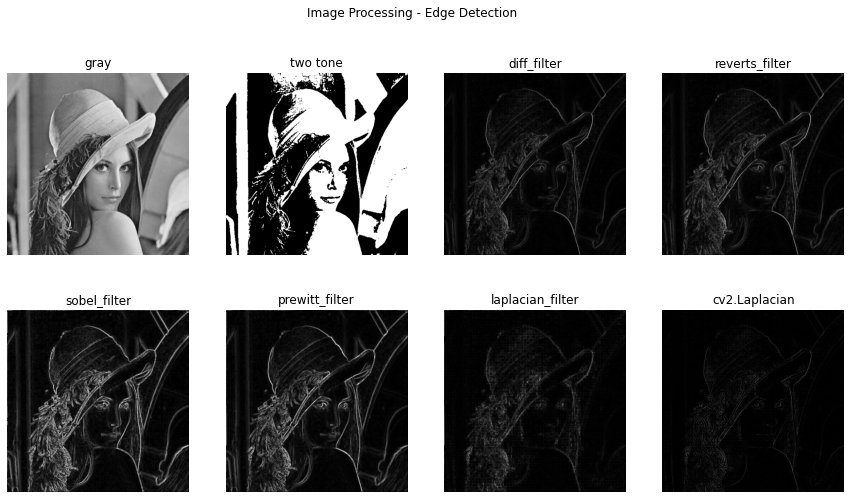

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,4, figsize=(15,8))
fig.suptitle("Image Processing - Edge Detection")
axes[0,0].imshow(lena_gray, cmap="gray")
axes[0,0].axis("off"); axes[0,0].set_title("gray")
axes[0,1].imshow(two_tone(lena_gray), cmap="gray")
axes[0,1].axis("off"); axes[0,1].set_title("two tone")
axes[0,2].imshow(A, cmap="gray")
axes[0,2].axis("off"); axes[0,2].set_title("diff_filter")
axes[0,3].imshow(B, cmap="gray")
axes[0,3].axis("off"); axes[0,3].set_title("reverts_filter")

axes[1,0].imshow(C, cmap="gray")
axes[1,0].axis("off"); axes[1,0].set_title("sobel_filter")
axes[1,1].imshow(D, cmap="gray")
axes[1,1].axis("off"); axes[1,1].set_title("prewitt_filter")
axes[1,2].imshow(E, cmap="gray")
axes[1,2].axis("off"); axes[1,2].set_title("laplacian_filter")
axes[1,3].imshow(F, cmap="gray")
axes[1,3].axis("off"); axes[1,3].set_title("cv2.Laplacian")

plt.show()

## cv2.Canny()

In [29]:
import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)
output = cv2.Canny(img, 150, 200)
cv2.imshow("Canny Edge", output)
cv2.waitKey()
cv2.destroyAllWindows()
# cv2.imwrite("lena_canny.jpg", cv2.Canny(lena_img, 100, 200))

In [30]:
import cv2

img = cv2.imread("images/paper.jpg", cv2.IMREAD_GRAYSCALE)
output = cv2.Canny(img, 150, 200)
cv2.imshow("Canny Edge", output)
cv2.waitKey()
cv2.destroyAllWindows()
# cv2.imwrite("lena_canny.jpg", cv2.Canny(lena_img, 100, 200))

In [31]:
def onChange(x):
    low = cv2.getTrackbarPos("Low", "Edge Detection")
    high = cv2.getTrackbarPos("High", "Edge Detection")

    if low > high:
        pass # print("Low thresold must be low than high theshold")
    else:
        canny = cv2.Canny(img, low, high)
        cv2.imshow("Edge Detection", canny)

import cv2

img = cv2.imread("images/house.jpg", cv2.IMREAD_GRAYSCALE)

cv2.namedWindow("Edge Detection")

cv2.createTrackbar("Low", "Edge Detection", 0, 255, onChange)
cv2.createTrackbar("High", "Edge Detection", 0, 255, onChange)
cv2.imshow("Edge Detection", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [32]:
import cv2
import numpy as np

# 카메라 장치 연결
cap = cv2.VideoCapture(0)   
while cap.isOpened():

    ret, frame = cap.read()
    if not ret:
        break
    if cv2.waitKey(1) == 27: # esc키로 종료
        break
        
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    output = cv2.Canny(img_gray, 100, 200)
    cv2.imshow('Camera', output)
    
cap.release()
cv2.destroyAllWindows()